#install important packages

In [1]:
pip install tensorflow sklearn pandas numpy matplotlib nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#import python packages

In [94]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import nltk
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D

#Read dataset as json file

In [50]:
with open("dataset_chatbot.json") as diabetes_dataset:
  dataset = json.load(diabetes_dataset)

In [51]:
def processing_json_dataset(dataset):
  tags = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
      inputs.append(lines)
      tags.append(intent['tag'])
  return [tags, inputs, responses]

In [52]:
[tags, inputs, responses] = processing_json_dataset(dataset)

#dataset as DataFrame

In [53]:
dataset = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [54]:
dataset.head()

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting


In [55]:
dataset = dataset.sample(frac=1)

In [56]:
dataset.head()

,inputs,tags
226,Can we consider obesity as one of the main cau...,obesity
98,Is there a way to detect diabetes?,test_diabetes
402,"Assuming I have type 1 diabetes, can diabetes ...",child
294,How can I know that I have diabetes by signs o...,signs
496,Does the patient's high body temperature lead ...,temperatures


#Pre-processing text of dataset

In [57]:
import string
dataset['inputs'] = dataset['inputs'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])

In [58]:
dataset.head()

,inputs,tags
226,"[c, a, n, , w, e, , c, o, n, s, i, d, e, r, ...",obesity
98,"[i, s, , t, h, e, r, e, , a, , w, a, y, , ...",test_diabetes
402,"[a, s, s, u, m, i, n, g, , i, , h, a, v, e, ...",child
294,"[h, o, w, , c, a, n, , i, , k, n, o, w, , ...",signs
496,"[d, o, e, s, , t, h, e, , p, a, t, i, e, n, ...",temperatures


In [59]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))

In [60]:
dataset.head()

,inputs,tags
226,can we consider obesity as one of the main cau...,obesity
98,is there a way to detect diabetes,test_diabetes
402,assuming i have type 1 diabetes can diabetes b...,child
294,how can i know that i have diabetes by signs o...,signs
496,does the patients high body temperature lead t...,temperatures


In [61]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
dataset['inputs'] = dataset['inputs'].apply(lambda sequence:
                                            [word for word in sequence.split() if word not in stop_words])

In [63]:
dataset.head()

,inputs,tags
226,"[consider, obesity, one, main, causes, type, 2...",obesity
98,"[way, detect, diabetes]",test_diabetes
402,"[assuming, type, 1, diabetes, diabetes, passed...",child
294,"[know, diabetes, signs, indications]",signs
496,"[patients, high, body, temperature, lead, high...",temperatures


In [64]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ' '.join(wrd))

In [65]:
dataset.head()

,inputs,tags
226,consider obesity one main causes type 2 diabetes,obesity
98,way detect diabetes,test_diabetes
402,assuming type 1 diabetes diabetes passed child,child
294,know diabetes signs indications,signs
496,patients high body temperature lead high blood...,temperatures


In [66]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [67]:
dataset["inputs"] = dataset["inputs"].apply(lambda sequence:[porter.stem(word) for word in sequence.split()])

In [68]:
dataset["inputs"] .head()

226     [consid, obes, one, main, caus, type, 2, diabet]
98                                 [way, detect, diabet]
402        [assum, type, 1, diabet, diabet, pass, child]
294                          [know, diabet, sign, indic]
496    [patient, high, bodi, temperatur, lead, high, ...
Name: inputs, dtype: object

In [69]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ' '.join(wrd))

In [70]:
dataset.head()

,inputs,tags
226,consid obes one main caus type 2 diabet,obesity
98,way detect diabet,test_diabetes
402,assum type 1 diabet diabet pass child,child
294,know diabet sign indic,signs
496,patient high bodi temperatur lead high blood s...,temperatures


In [71]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
features = pad_sequences(train)
le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])

In [72]:
len(features[0])

14

In [73]:
input_shape = features.shape[1]
print(input_shape)

14


In [74]:
features.shape

(581, 14)

In [75]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  320
output length:  29


In [76]:
tokenizer.word_index

{'1': 8,
 '2': 12,
 '400': 293,
 '500': 294,
 'abil': 256,
 'abl': 102,
 'abstain': 262,
 'accept': 104,
 'accord': 284,
 'activ': 206,
 'actual': 191,
 'adio': 234,
 'affect': 42,
 'afflict': 308,
 'afraid': 108,
 'allow': 251,
 'also': 204,
 'alway': 152,
 'amount': 292,
 'analyz': 133,
 'anger': 142,
 'angri': 43,
 'answer': 185,
 'antibiot': 39,
 'anxieti': 35,
 'anyon': 241,
 'appear': 85,
 'assess': 268,
 'associ': 77,
 'assum': 175,
 'ate': 235,
 'attack': 67,
 'back': 265,
 'bad': 44,
 'basic': 212,
 'behind': 266,
 'blood': 3,
 'bodi': 54,
 'breakfast': 37,
 'breath': 166,
 'bro': 193,
 'brother': 316,
 'bye': 139,
 'byr': 279,
 'case': 163,
 'catch': 207,
 'caus': 19,
 'certain': 286,
 'chanc': 109,
 'chang': 132,
 'check': 146,
 'child': 29,
 'children': 75,
 'chore': 280,
 'clarifi': 124,
 'clear': 184,
 'clearli': 195,
 'close': 277,
 'clue': 283,
 'compens': 314,
 'complet': 150,
 'concept': 287,
 'condit': 285,
 'confirm': 98,
 'connect': 311,
 'consequ': 105,
 'consid':

#RNN MODEL

## Build RNN Model

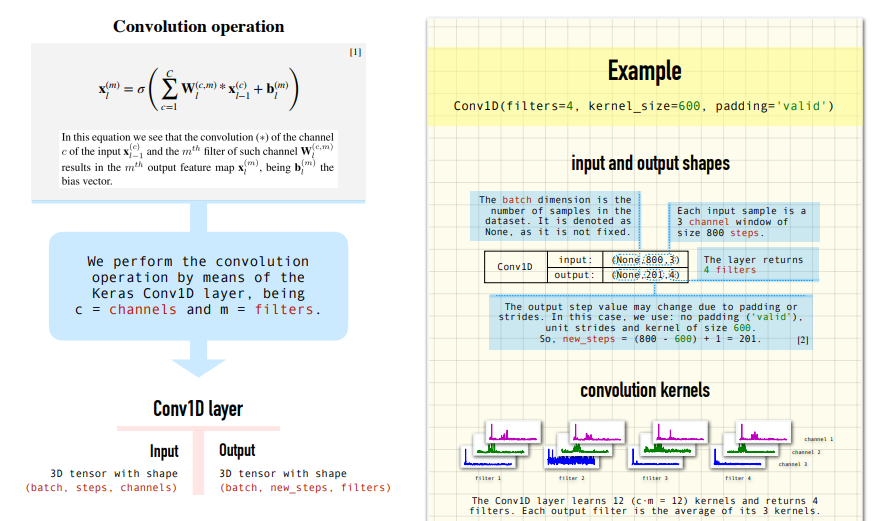

In [77]:
m = Sequential()
m.add(Input(shape=(input_shape,)))
m.add(Embedding(vocabulary + 1,300))
m.add(Dropout(0.3)) 
m.add(Conv1D(filters=32, kernel_size=3, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
m.add(MaxPool1D(pool_size=2)) 
m.add(Dropout(0.3))
m.add(Conv1D(filters=32, kernel_size=3, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
m.add(MaxPool1D(pool_size=2)) 
m.add(Dropout(0.3))
m.add(GRU(256, recurrent_dropout=0.3,return_sequences=True))
m.add(Dropout(0.3))
m.add(GRU(128, recurrent_dropout=0.3,return_sequences=False))
m.add(Dropout(0.3))
m.add(Dense(64,activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
m.add(Dropout(0.3))
m.add(Dense(output_length, activation="softmax"))

In [31]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2022-07-03 06:23:40--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-03 06:23:40--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2022-07-03 06:26:20 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [78]:
m.layers

In [35]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [79]:
glove_dir = "glove.6B.300d.txt"
embeddings_index = {}
file_ = open(glove_dir)
for line in file_:
    arr = line.split()
    single_word = arr[0]
    w = np.asarray(arr[1:],dtype='float32')
    embeddings_index[single_word] = w
file_.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [80]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words,300)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [81]:
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False

In [82]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [83]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 14, 300)           96300     
                                                                 
 dropout_6 (Dropout)         (None, 14, 300)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 32)            28832     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 32)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 32)             3104      
                                                      

In [84]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 700, mode = 'min', restore_best_weights = True)

In [85]:
history_training = m.fit(features,labels,epochs=5500, batch_size=32, callbacks=[ earlyStopping])

Epoch 1/5500
19/19 [==============================] - 5s 17ms/step - loss: 3.3555 - accuracy: 0.0585
Epoch 2/5500
19/19 [==============================] - 0s 17ms/step - loss: 3.2494 - accuracy: 0.0775
Epoch 3/5500
19/19 [==============================] - 0s 16ms/step - loss: 3.0904 - accuracy: 0.1394
Epoch 4/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.9362 - accuracy: 0.1360
Epoch 5/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.7122 - accuracy: 0.1842
Epoch 6/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.5855 - accuracy: 0.1893
Epoch 7/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.4717 - accuracy: 0.2048
Epoch 8/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.3201 - accuracy: 0.2427
Epoch 9/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.1261 - accuracy: 0.3184
Epoch 10/5500
19/19 [==============================] - 0s 17ms/step - loss: 2.0628 - accura

In [91]:
import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (20, 5))
  plt.plot(data,'darkblue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

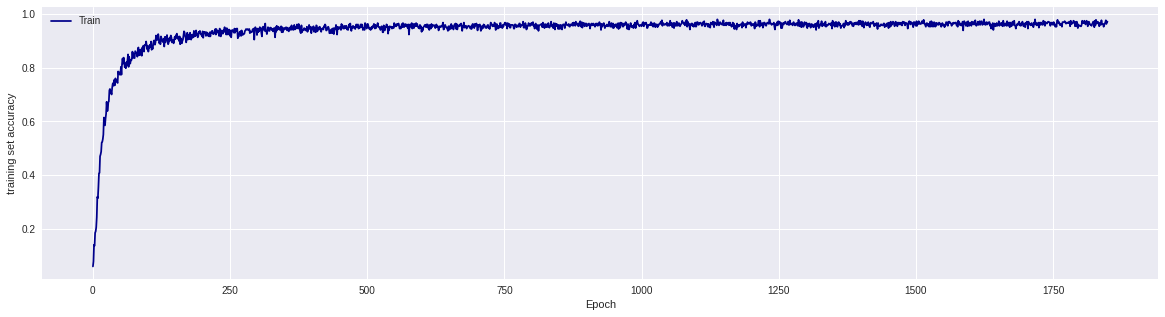

In [92]:
draw_plot(history_training.history['accuracy'],'training set accuracy' )

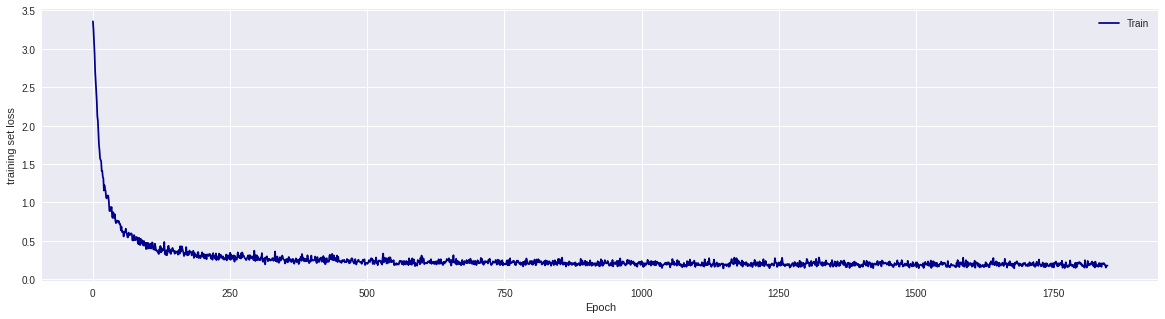

In [93]:
draw_plot(history_training.history['loss'],'training set loss' )

#Live Testing

In [47]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  pred_input = [word for word in pred_input.split() if word not in stop_words]
  pred_input = ' '.join(pred_input)
  pred_input = [porter.stem(word) for word in pred_input.split()]
  pred_input = ' '.join(pred_input)
  texts.append(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_shape)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  return random.choice(responses[response_tag])

In [90]:
while True:
  texts_p = []
  query = input('You : ')
  res_tag = generate_answer(query)
  if query == "exit":
    break
  print(res_tag)  

You : what is diabetes?
Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.
You : how to test if i have diabetes?
If the results of the following tests are according to the following figure, then he has diabetes 1) Your A1C test is 6.5% or more 2) Fasting blood glucose level of 126 mg/dL or more 3) Oral glucose tolerance test is 200 mg/dL or more
You : What is the normal blood sugar level in the body an hour after eating?
We can define it according to the following figure and methodology, the highest blood sugar levels generally occur one hour after a meal if carbohydrates are eaten. Two hours after a meal, the protein begins to break down into blood sugar which ca

In [95]:
m.save("chabot.h5")